Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
100/100 [==============================] - 31s 310ms/step - loss: 0.6895 - acc: 0.5310 - val_loss: 0.6757 - val_acc: 0.5160
Epoch 2/10
100/100 [==============================] - 7s 66ms/step - loss: 0.6506 - acc: 0.6255 - val_loss: 0.6288 - val_acc: 0.6580
Epoch 3/10
100/100 [==============================] - 6s 65ms/step - loss: 0.5992 - acc: 0.6730 - val_loss: 0.6087 - val_acc: 0.6680
Epoch 4/10
100/100 [==============================] - 6s 65ms/step - loss: 0.5632 - acc: 0.7050 - val_loss: 0.5917 - val_acc: 0.6650
Epoch 5/10
100/100 [==============================] - 6s 62ms/step - loss: 0.5359 - acc: 0.7255 - val_loss: 0.5749 - val_acc: 0.6970
Epoch 6/10
100/100 [==============================] - 7s 65ms/step - loss: 0.5126 - acc: 0.7410 - val_loss: 0.5851 - val_acc: 0.6970
Epoch 7/10
100/100 [==============================] - 7s 68ms/step -

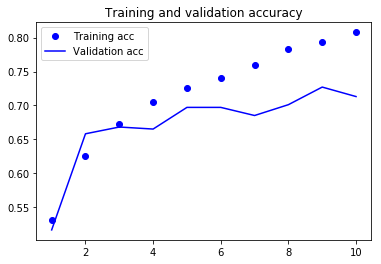

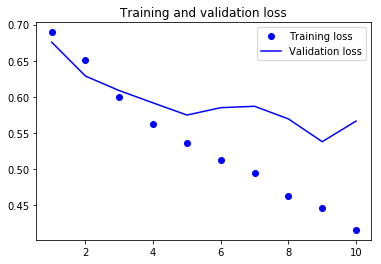

In [6]:
# 卷积实现：
from keras import layers 
from keras import models 
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())   # 数据扁平化
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))  # 因为分类问题，所以我们的激活用sigmoid
from keras import optimizers 
model.compile(loss='binary_crossentropy', 
optimizer=optimizers.RMSprop(lr=1e-4), 
metrics=['acc'])

from keras.preprocessing.image import ImageDataGenerator 
train_datagen = ImageDataGenerator(rescale=1./255)  #将所有图像乘以 1/255 缩放 
test_datagen = ImageDataGenerator(rescale=1./255) 

train_dir = './files/cats_and_dogs_small/train'
validation_dir = './files/cats_and_dogs_small/validation'

train_generator = train_datagen.flow_from_directory( 
train_dir, 
target_size=(150, 150),  #将所有图像的大小调整为 150×150
batch_size=20,  #每次批量，你当然可以自己决定说取多少个
class_mode='binary')  #因为使用了 binary_crossentropy 损失，所以需要用二进制标签
validation_generator = test_datagen.flow_from_directory( 
validation_dir, 
target_size=(150, 150), 
batch_size=20, 
class_mode='binary')

history = model.fit_generator( 
train_generator, 
steps_per_epoch=100, #生成 器中抽取 steps_per_epoch 个批量后（即运行了 steps_per_epoch 次梯度下降），拟合过程 将进入下一个轮次。本例中，每个批量包含 20 个样本，所以读取完所有 2000 个样本需要 100 
#个批量。 
epochs=10,  #循环几次
validation_data=validation_generator, 
validation_steps=50)  
#运行完，save一下model是良好的行为习惯
model.save('cats_and_dogs_small_1.h5')

import matplotlib.pyplot as plt 
acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs = range(1, len(acc) + 1) 
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend() 
plt.figure() 
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend() 